In [2]:
import pandas as pd

from collections import defaultdict

import nltk
from nltk.corpus import stopwords

import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

import seaborn as sns #Visulization

from matplotlib import style;
style.use('ggplot')

In [3]:
# Read the files with the pandas dataFrame
#  pass use the '\t' delimiter as argument because it is a tab separated file to prevent parser error

df_train = pd.read_csv('drugsCom_raw/drugsComTest_raw.tsv',delimiter='\t')
df_test = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv', delimiter='\t')

In [4]:
print(df_train.shape)
print(df_test.shape)

(53766, 7)
(161297, 7)


In [5]:
# combine the two dataFrames into one for a bigger data size and ease of preprocessing
df_all = pd.concat([df_train,df_test])

In [6]:
print(df_all.shape)

(215063, 7)


In [7]:
# rename columns
df_all.columns = ['Id','drugName','condition','review','rating','date','usefulCount'] 

In [8]:
df_all.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [10]:
#convert date to datetime eventhough we are not using date in this
df_all['date'] = pd.to_datetime(df_all['date'])   

In [11]:
df_all.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,2015-10-22,4


### EDA Figures

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

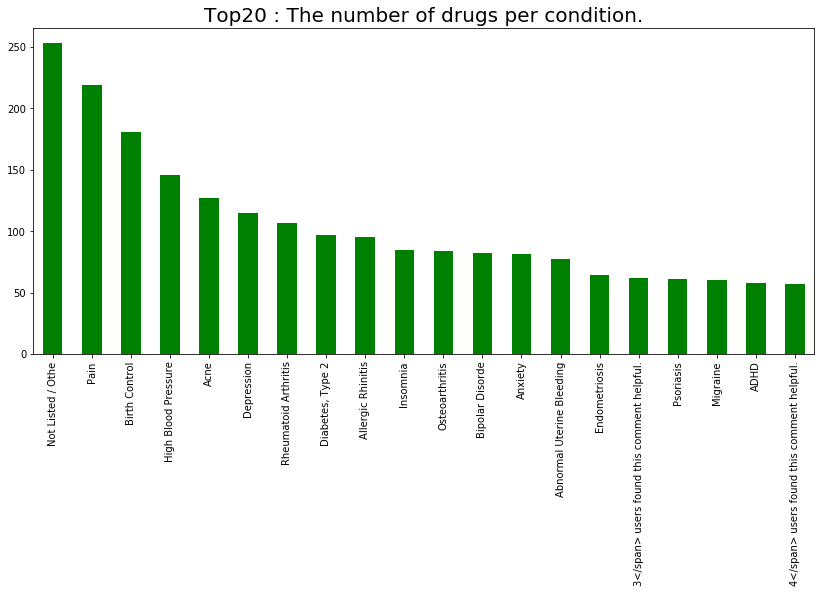

In [14]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

Text(0.5, 1.0, 'Count of rating values')

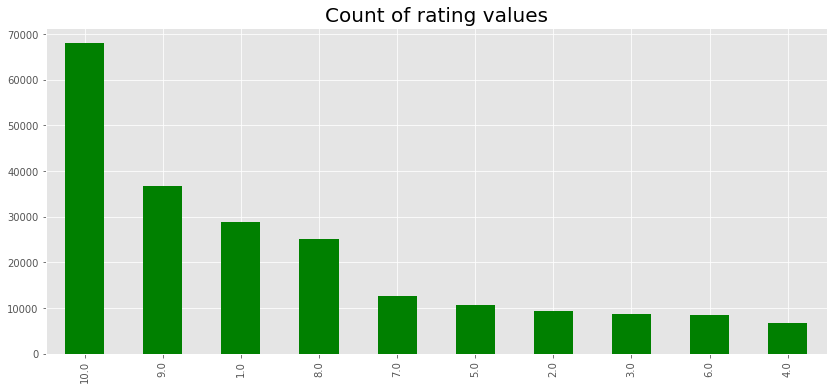

In [47]:
rating = df_all['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

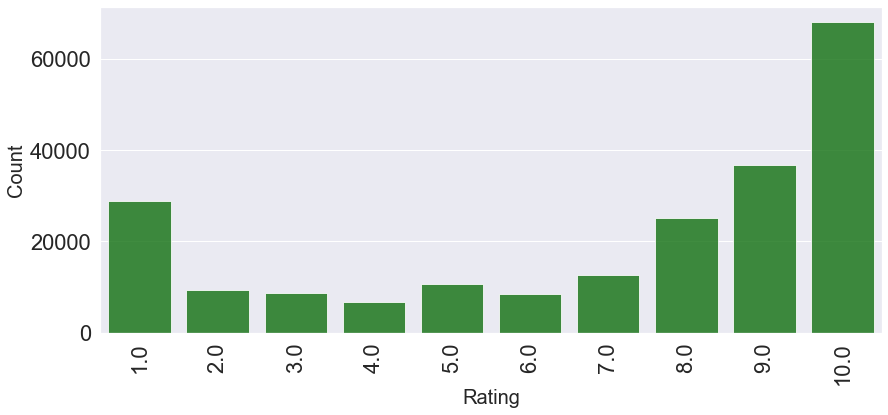

In [72]:
cnt_srs = df_all['rating'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.set(font_scale=2)
bar_plot = sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title("")
plt.show()

fig = bar_plot.get_figure()
fig.savefig("count_rating", bbox_inches='tight')

In [9]:
df_all['rating'].value_counts()

10.0    68005
9.0     36708
1.0     28918
8.0     25046
7.0     12547
5.0     10723
2.0      9265
3.0      8718
6.0      8462
4.0      6671
Name: rating, dtype: int64

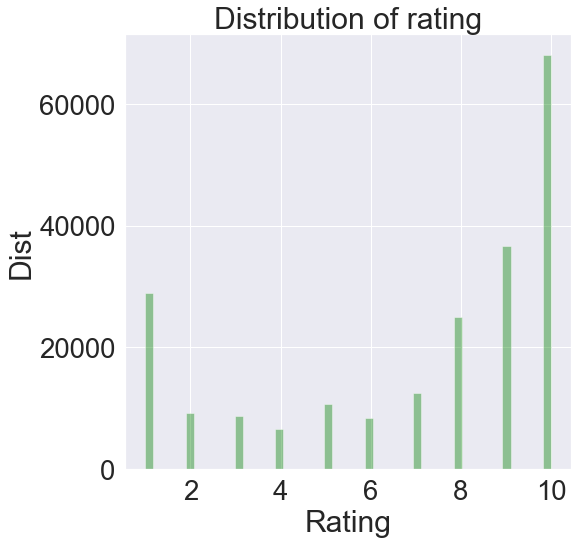

In [66]:
plt.figure(figsize=(8,8))
sns.distplot(df_all['rating'], color='green', norm_hist=False, kde=False)

plt.xlabel('Rating')
plt.ylabel('Dist')
plt.title("Distribution of rating")
plt.show()

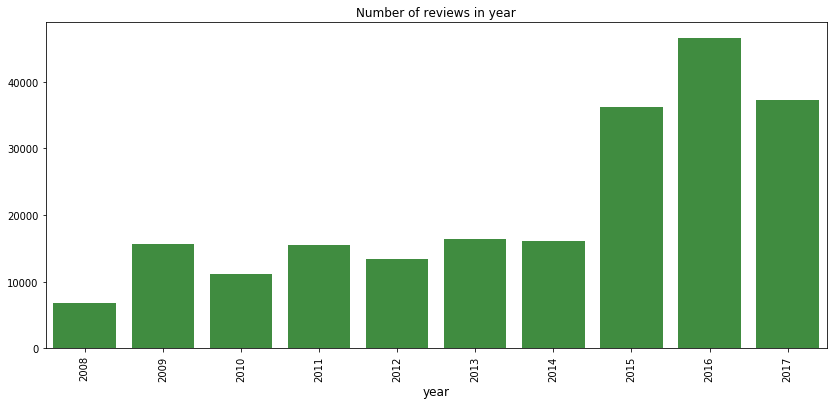

In [34]:
# Code in https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
# SRK - Simple Exploration Notebook 

cnt_srs = df_all['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('year', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Number of reviews in year")
plt.show()

In [12]:
df_all['date'].dt.year.value_counts()

2016    46607
2017    37311
2015    36192
2013    16359
2014    16104
2009    15642
2011    15454
2012    13382
2010    11227
2008     6785
Name: date, dtype: int64

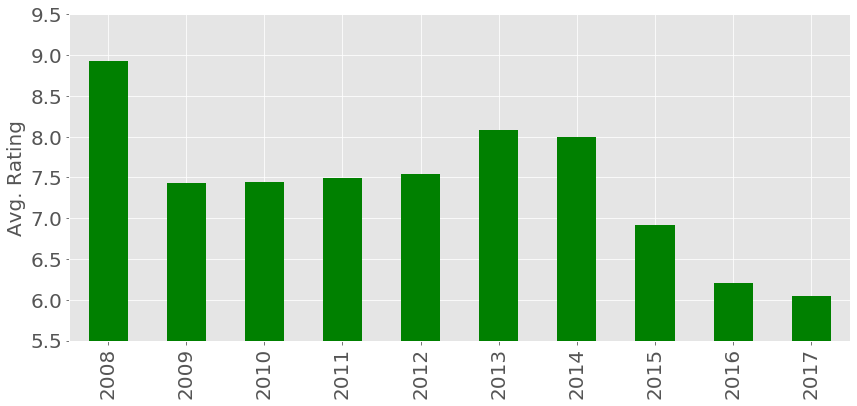

In [14]:
df_all['year'] = df_all['date'].dt.year
rating = df_all.groupby('year')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 20,color="green", ylim = [5.5,9.5])
plt.xlabel("", fontsize = 20)
plt.ylabel("Avg. Rating", fontsize = 20)
#plt.title("", fontsize = 20)
plt.savefig("mean_rating_in_year", bbox_inches='tight')

In [17]:
df_all.groupby('year')['rating'].mean()

year
2008    8.927192
2009    7.427439
2010    7.444642
2011    7.498318
2012    7.546555
2013    8.087291
2014    8.000994
2015    6.921364
2016    6.200785
2017    6.042374
Name: rating, dtype: float64

In [19]:
df_all.groupby('year')['rating'].mean().describe()

count    10.000000
mean      7.409695
std       0.863403
min       6.042374
25%       7.047883
50%       7.471480
75%       7.887384
max       8.927192
Name: rating, dtype: float64

In [18]:
df_all['rating'].describe()

count    215063.000000
mean          6.990008
std           3.275554
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

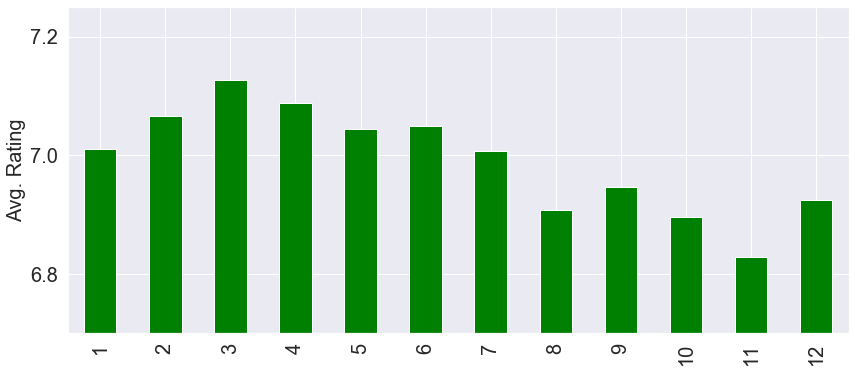

In [60]:
df_all['month'] = df_all['date'].dt.month
rating = df_all.groupby('month')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 20,color="green", ylim = [6.7,7.25])
plt.xlabel("", fontsize = 20)
plt.ylabel("Avg. Rating", fontsize = 20)
plt.title("", fontsize = 20)
plt.savefig("mean_rating_in_month", bbox_inches='tight')

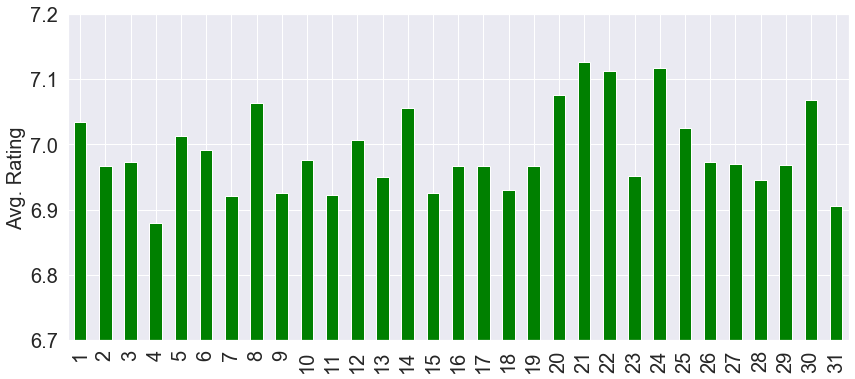

In [61]:
df_all['day'] = df_all['date'].dt.day
rating = df_all.groupby('day')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 20,color="green", ylim = [6.7,7.2])
plt.xlabel("", fontsize = 20)
plt.ylabel("Avg. Rating", fontsize = 20)
plt.title("", fontsize = 20)
plt.savefig("mean_rating_in_day", bbox_inches='tight')

In [39]:
df_all["usefulCount"].describe()

count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

Text(0.5, 1.0, 'Mean rating in usefulCount')

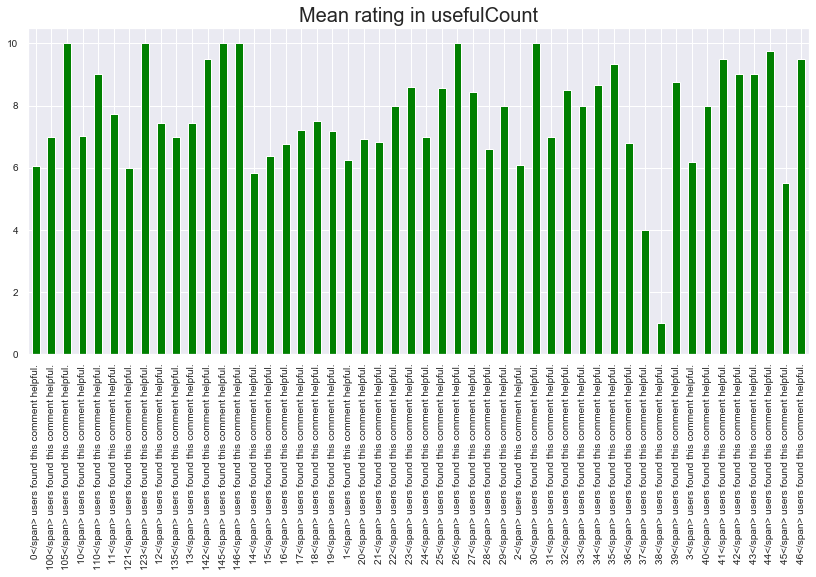

In [88]:
rating = df_all.groupby('condition')['rating'].mean()
rating[:50].plot(kind="bar", figsize = (14,6), fontsize = 10, color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in usefulCount", fontsize = 20)

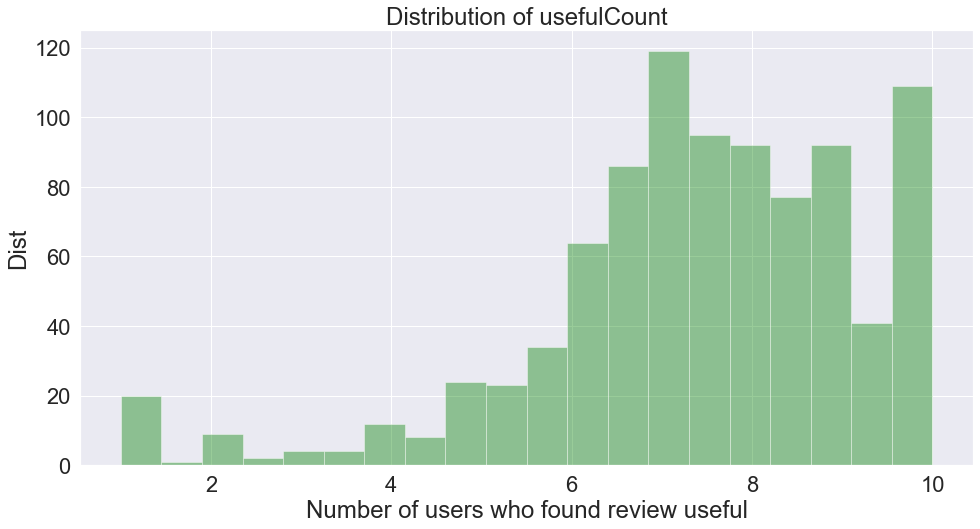

In [89]:
plt.figure(figsize=(16,8))

sns.distplot(rating, color = 'green', kde=False)

plt.xlabel('Number of users who found review useful')
plt.ylabel('Dist')
plt.title("Distribution of usefulCount")

plt.show()

Text(0.5, 1.0, 'Mean rating in condition')

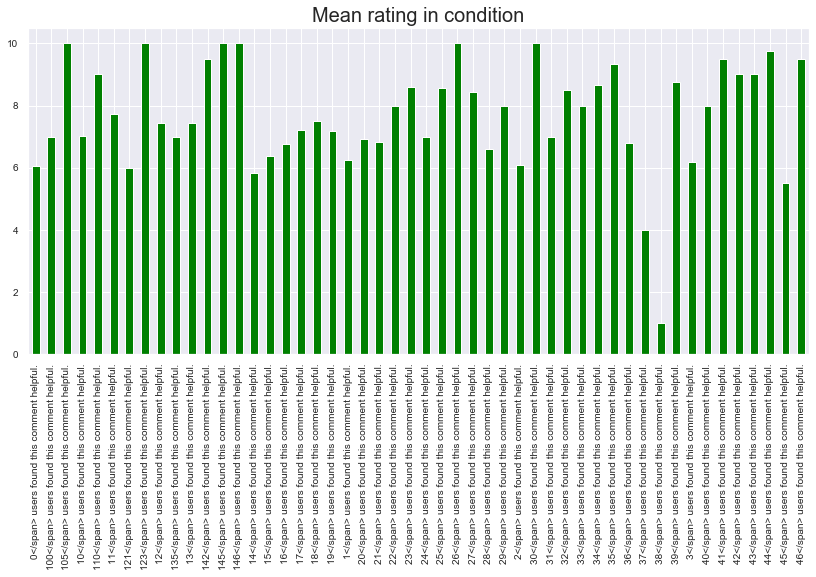

In [81]:
rating = df_all.groupby('condition')['rating'].mean()
rating[:50].plot(kind="bar", figsize = (14,6), fontsize = 10, color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in condition", fontsize = 20)

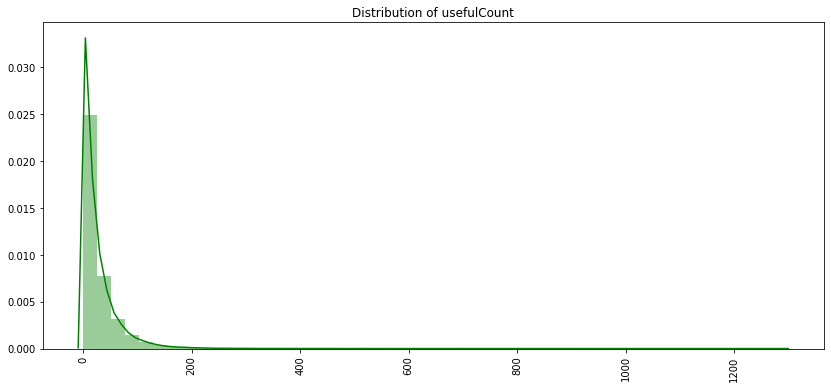

In [44]:
plt.figure(figsize=(14,6))
sns.distplot(df_all["usefulCount"].dropna(),color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

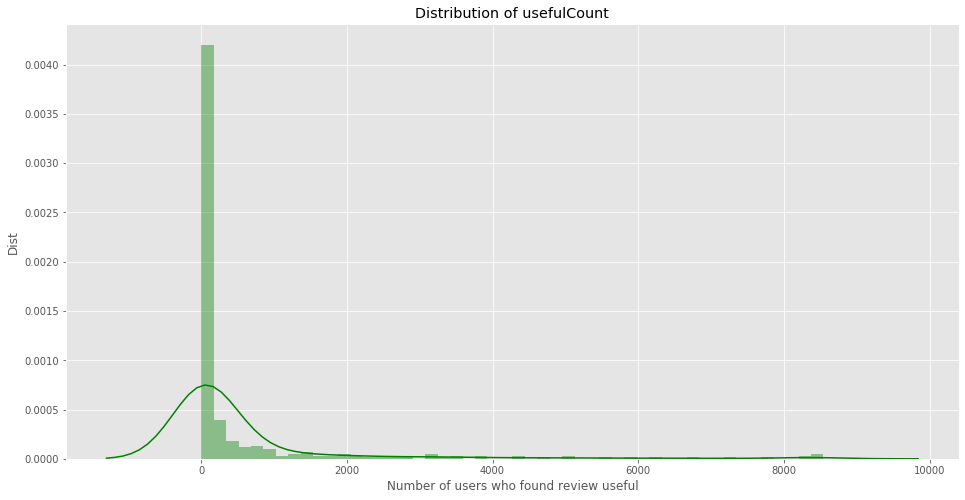

In [78]:
plt.figure(figsize=(16,8))

sns.distplot(df_all['usefulCount'].value_counts(), color = 'green')

plt.xlabel('Number of users who found review useful')
plt.ylabel('Dist')
plt.title("Distribution of usefulCount")

plt.show()

In [57]:
conditions = df_all["condition"].value_counts().sort_values(ascending=False)
conditions[:10]

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

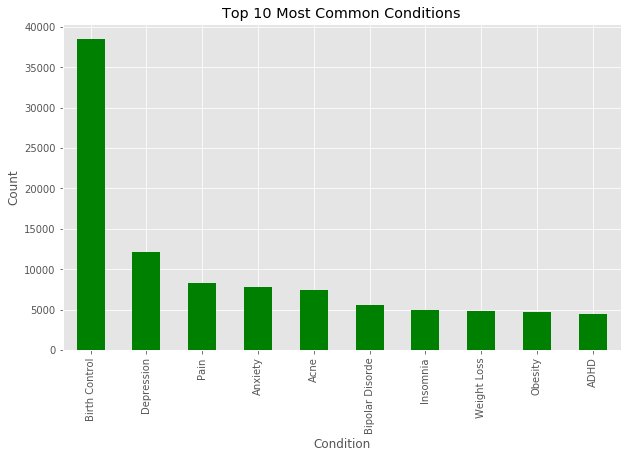

In [58]:
conditions[:10].plot(kind='bar', figsize = (10,6), fontsize = 10, color="green")
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');

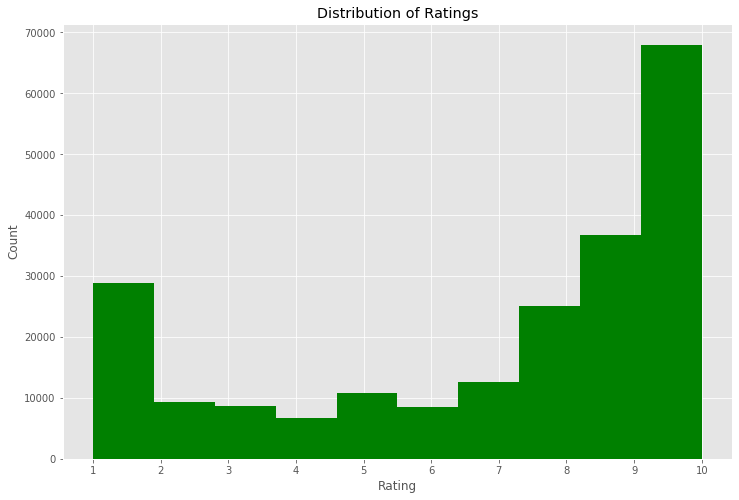

In [59]:
# Look at bias in review (also shown on 'Data' page in competition: distribution of ratings)
df_all["rating"].hist(color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)]);

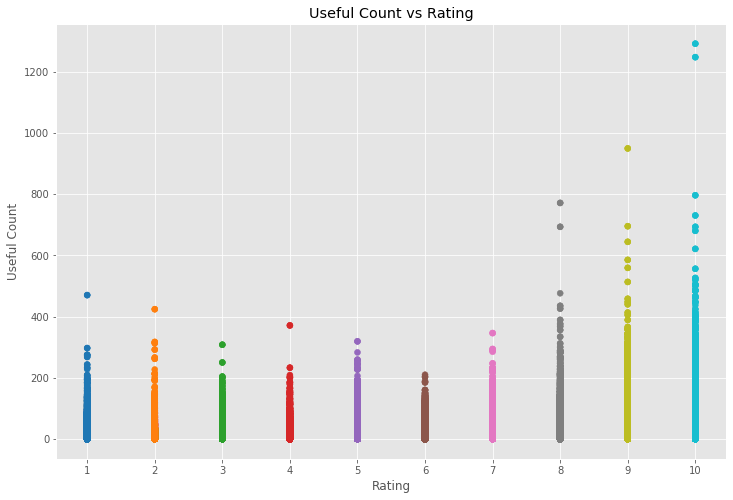

In [66]:
# Is rating correlated with usefulness of the review?
plt.scatter(df_all.rating, df_all.usefulCount, c=df_all["rating"].values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)]);

In [ ]:
# Create a list (cast into an array) containing the average usefulness for given ratings
use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(train[train.rating == i].usefulCount) / np.sum([train.rating == i])])
    
use_arr = np.asarray(use_ls)

Text(0.5, 1.0, 'Average Useful Count vs Rating')

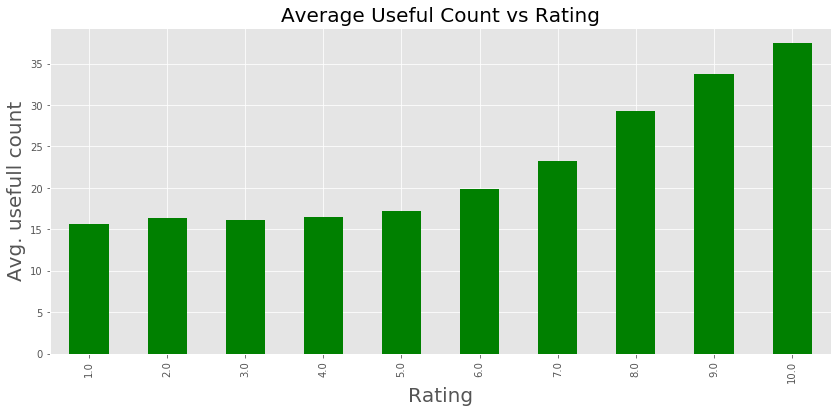

In [70]:
rating = df_all.groupby('rating')['usefulCount'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Avg. usefull count", fontsize = 20)
plt.title("Average Useful Count vs Rating", fontsize = 20)

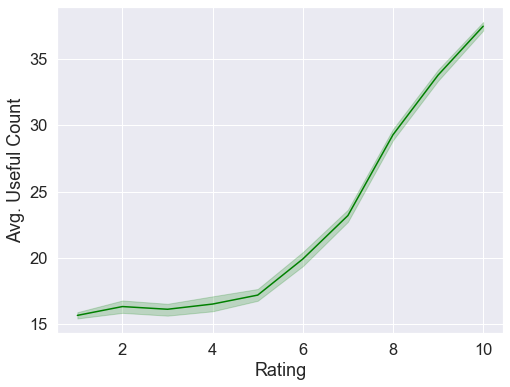

In [23]:
sns.set(font_scale=1.5)

plt.figure(figsize=(8,6))
line_plot = sns.lineplot(x='rating',y='usefulCount',data=df_all, color='green')

plt.xlabel('Rating')
plt.ylabel('Avg. Useful Count')

plt.show()

fig = line_plot.get_figure()
fig.savefig("useful_count_rating", bbox_inches='tight')

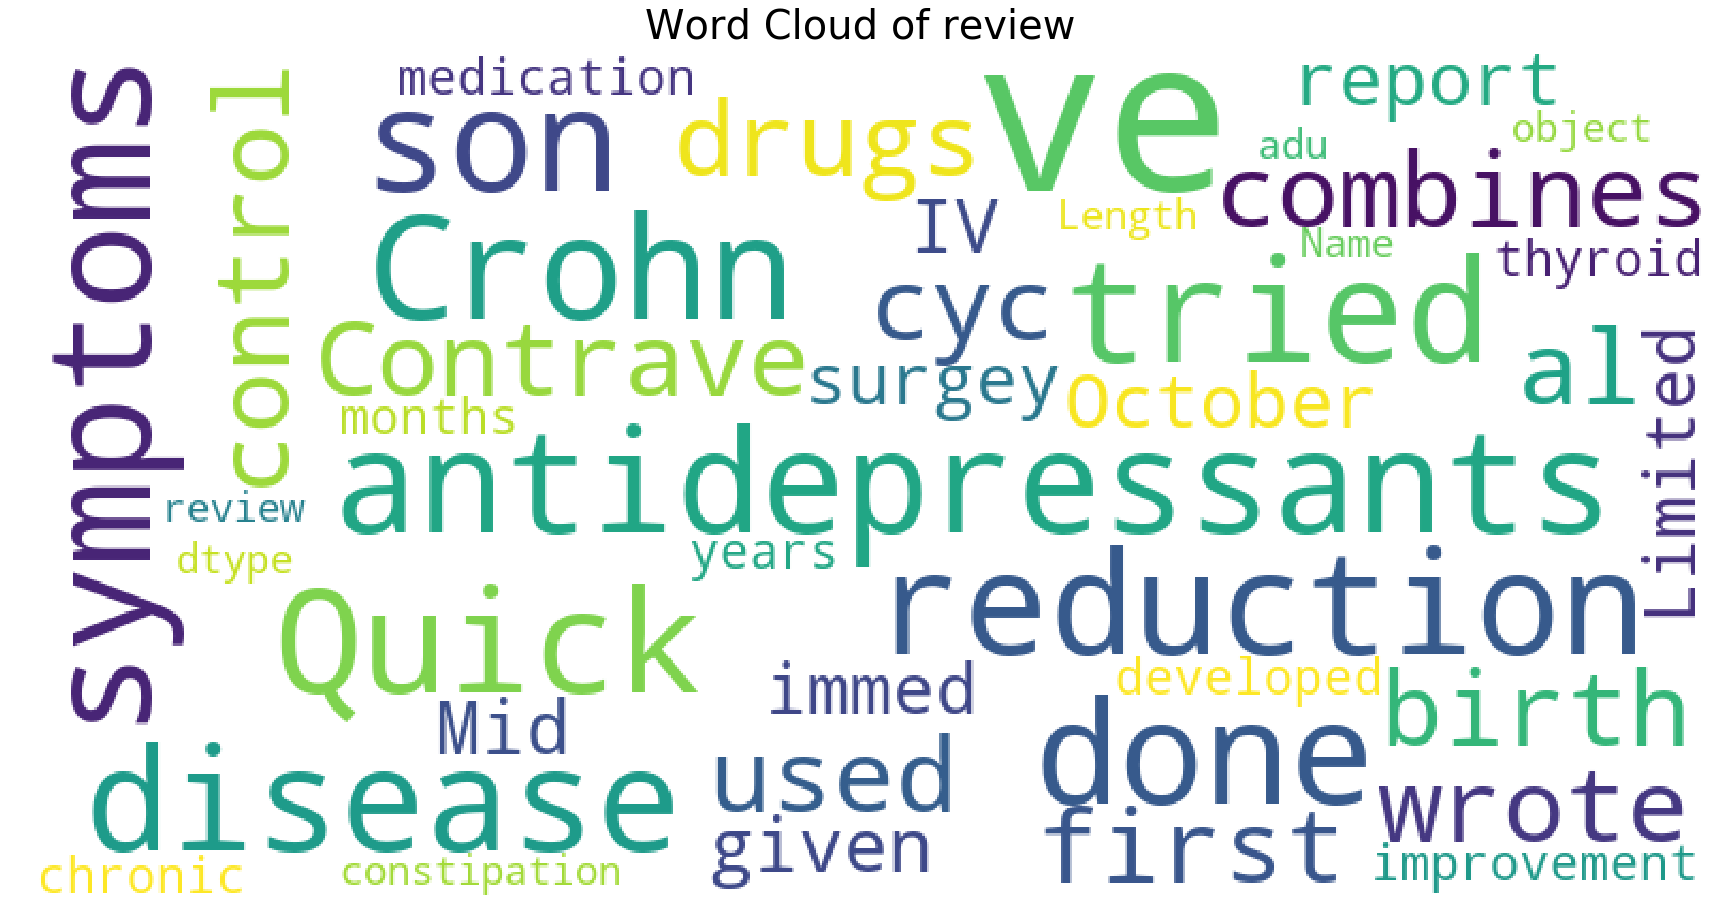

In [18]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc kernel 
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_all["review"], title="Word Cloud of review")

In [20]:
df_all_6_10 = df_all[df_all["rating"]>5]
df_all_1_5 = df_all[df_all["rating"]<6]

In [25]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

### Uni-gram

In [80]:
## Get the bar chart from rating  8 to 10 review ##
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from rating  4 to 7 review ##
freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### bi-gram

In [84]:
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of rating 1 to 5", 
                                          "Frequent biagrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

### tri-gram

In [85]:
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent trigrams of rating 1 to 5", 
                                          "Frequent trigrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

### 4-gram

In [86]:
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent 4-grams of rating 1 to 5", 
                                          "Frequent 4-grams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="4-grams Count Plots")
py.iplot(fig, filename='word-plots')